In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
#importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [36]:
#shape of dataset
df.shape

(32560, 15)

In [37]:
#features of datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
#statistical summary
df.describe().T

count           mean            std      min       25%  \
Age             32560.0      38.581634      13.640642     17.0      28.0   
Fnlwgt          32560.0  189781.814373  105549.764924  12285.0  117831.5   
Education_num   32560.0      10.080590       2.572709      1.0       9.0   
Capital_gain    32560.0    1077.615172    7385.402999      0.0       0.0   
Capital_loss    32560.0      87.306511     402.966116      0.0       0.0   
Hours_per_week  32560.0      40.437469      12.347618      1.0      40.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
Fnlwgt          178363.0  237054.5  1484705.0  
Education_num       10.0      12.0       16.0  
Capital_gain         0.0       0.0    99999.0  
Capital_loss         0.0       0.0     4356.0  
Hours_per_week      40.0      45.0       99.0

In [39]:
n_records= df.shape[0]
n_features= df.shape[1]

In [40]:
#finding number if records where individual's income is more than $50K
n_greater_50k= df[df['Income'] == ' <=50K'].shape[0]
#finding number if records where individual's income is at most $50K
n_at_most_50k= df[df['Income'] == ' >50K'].shape[0]
#percentage of individuals whose income is more than $50K
greater_percent= (n_greater_50k/n_records)*100

#print the results
print('Total number of records:{}'.format(n_records))
print('Total number of features:{}'.format(n_features))
print('Individuals making more than $50k:{}'.format(n_greater_50k))
print('Individuals making at most $50k:{}'.format(n_at_most_50k))
print('Percentage of individuals making more than $50k:{}'.format(greater_percent))

Total number of records:32560
Total number of features:15
Individuals making more than $50k:24719
Individuals making at most $50k:7841
Percentage of individuals making more than $50k:75.91830466830467


In [41]:
#data cleaning
#dropping columns that are not needed
df.drop('Education', inplace=True, axis=1)
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

Above I have dropped Education column which is duplicate feature of Education_num, but in a non-numerical format.

In [42]:
#checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

It seems that there are no null values in the dataset

In [43]:
#checking for duplicates and then removing it
print('Before removing the duplicates:', df.duplicated().sum())
df=df[~df.duplicated()]
print('After removing the duplicates:', df.duplicated().sum())

Before removing the duplicates: 24
After removing the duplicates: 0


We have removed 24 duplicate rows to make our dataset more realistic and error-free

In [44]:
#before discarding
df.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [45]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [46]:
#before changing '?'
df.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [47]:
df.Occupation.value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [48]:
df.Native_country.value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [49]:
df=df.replace('?', np.nan)

In [50]:
columns_with_nan= ['Workclass','Occupation','Native_country']

In [51]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [52]:
#quick look on some statictics about the data
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [53]:
#Heatmap
plt.figure(figsize=[10,10])
ct_counts = df.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');


In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

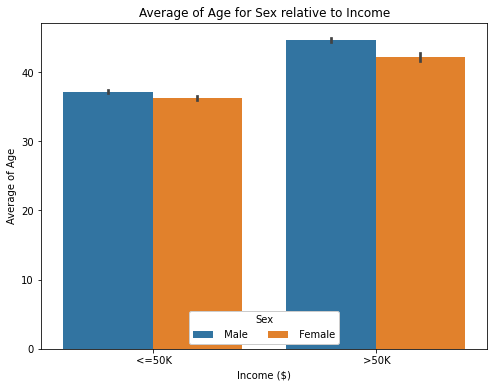

In [54]:
#Clustered bar chart
plt.figure(figsize=[8,6])
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

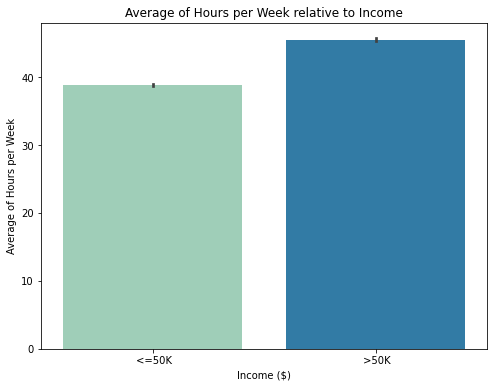

In [55]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=df, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

In [56]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

<AxesSubplot:>

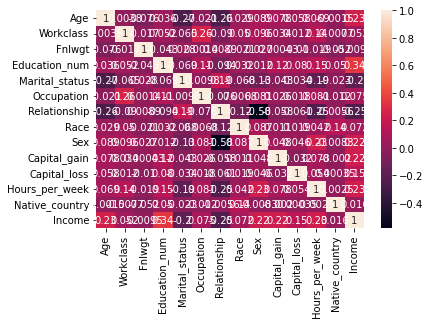

In [70]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
Above we can see that income has correlation with Education, hours per week and age and capital gain also. The correlations are moderate.

In [57]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [58]:
#Feature Selection#Partitioning the data
x = df.drop('Income', axis=1)
y = df['Income']

In [59]:
#import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
#import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Splitting to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
models = {}

#models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [64]:
#Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, x, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.7874124033127501 | test:  0.7876506450572969
F1-score: train:  0.4008931221602442 | test:  0.4009168583079519
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999462138384111 | test:  0.8600320500196045
F1-score: train:  0.9998883636124652 | test:  0.6822730859604398
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8605160486344559 | test:  0.859878430764694
F1-score: train:  0.6758551776034409 | test:  0.6732769211375302
---------------------------------------------------------


In [65]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [66]:
clf = RandomForestClassifier()
results = cross_validate(clf, x_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999797546516825 | test:  0.9375228788281514
F1-score: train:  0.9999797550359283 | test:  0.940387429349235


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x_resampled, y_resampled, test_size=0.2, random_state=42)

In [69]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (39515, 13)
x_test shape: (9879, 13)
y_train shape: (39515,)
y_test shape: (9879,)


In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [74]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

In [75]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(x_train, y_train)
y_pred_ran_for = ran_for.predict(x_test)

In [76]:
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 65.53
F1 score: 62.96


In [77]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 73.28
F1 score: 75.44


In [78]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 59.19
F1 score: 31.87


In [79]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 93.25
F1 score: 93.51


In [80]:
#Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [81]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [82]:
rf_tuned = RandomForestClassifier(random_state=42)

In [83]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [85]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [86]:
rf_cv.best_score_

0.9205111982791344

In [87]:
rf_cv.best_params_

{'n_estimators': 126, 'max_depth': 79}

In [88]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [89]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [90]:
y_pred_rf_best = rf_best.predict(x_test)

In [91]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 93.24
F1 score: 93.5


In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

In [93]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4968
           1       0.89      0.98      0.94      4911

    accuracy                           0.93      9879
   macro avg       0.94      0.93      0.93      9879
weighted avg       0.94      0.93      0.93      9879



#Conclusion:
After hyperparameter tuning random forest classifier gives the highest accuracy score of 93.24 and f1 score of 93.5.